<a href="https://colab.research.google.com/github/cornel-kim/samples/blob/DataScienceColab/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
school=pd.read_csv("http://modcom.co.ke/data2020/datasets/school.csv")
school

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,0.0,NaN,0:12:55,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,0.0,9.125,0:08:33,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,0.0,NaN,NaN,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,2.0,6.905,0:08:26,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [4]:
print(school.isnull().sum)

<bound method DataFrame.sum of        ids   bday  enrolldate  ...  CommuteTime  SleepTime  StudyTime
0    False  False        True  ...         True      False      False
1    False  False        True  ...         True      False      False
2    False  False        True  ...         True      False      False
3    False  False        True  ...         True      False      False
4    False  False        True  ...         True      False      False
..     ...    ...         ...  ...          ...        ...        ...
430  False  False       False  ...        False      False      False
431  False  False       False  ...        False      False      False
432  False   True       False  ...        False      False      False
433  False   True       False  ...        False      False      False
434  False   True       False  ...        False      False      False

[435 rows x 23 columns]>


In [6]:
subset1=school[['English', 	'Reading', 'Math',	'Writing', 'State', 'SleepTime' 	]]
subset1

,English,Reading,Math,Writing,State,SleepTime
0,88.24,81.50,60.02,81.44,In state,7.0
1,89.45,85.25,70.19,73.27,NaN,5.0
2,96.73,86.88,71.20,84.24,In state,8.0
3,74.06,88.68,55.89,73.16,In state,2.0
4,82.61,77.30,65.52,80.45,Out of state,7.0
...,...,...,...,...,...,...
430,87.72,84.99,65.31,NaN,In state,1.0
431,91.01,86.87,70.25,82.67,In state,6.0
432,81.05,85.76,58.16,81.87,NaN,6.0
433,75.59,85.97,66.84,79.35,In state,4.0


In [7]:
subset1.describe()

,English,Reading,Math,Writing,SleepTime
count,409.000000,425.000000,422.000000,404.000000,403.000000
mean,82.787555,82.070800,65.468009,79.521683,5.461538
std,6.839803,7.661778,8.375930,5.511410,2.421994
min,59.830000,55.110000,35.320000,64.060000,0.000000
25%,78.330000,77.190000,60.202500,75.750000,4.000000
50%,83.150000,81.940000,65.445000,79.035000,5.000000
75%,87.170000,87.080000,70.567500,83.687500,7.000000
max,101.950000,103.620000,93.780000,93.010000,13.000000


In [9]:
subset1.corr()

,English,Reading,Math,Writing,SleepTime
English,1.000000,0.333183,0.243014,0.366806,-0.055363
Reading,0.333183,1.000000,0.519849,0.105491,-0.023526
Math,0.243014,0.519849,1.000000,0.118626,0.033616
Writing,0.366806,0.105491,0.118626,1.000000,0.015838
SleepTime,-0.055363,-0.023526,0.033616,0.015838,1.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


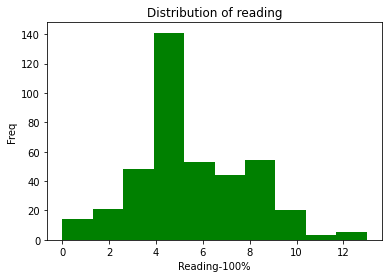

In [19]:
import matplotlib.pyplot as plt
import seaborn as sbn
x, y = plt.subplots()
y.hist(subset1['SleepTime'], color="Green")
y.set_title("Distribution of reading")
y.set_xlabel("Reading-100%")
y.set_ylabel("Freq")
plt.show()

In [56]:
#fill empties categorical variables
# school=pd.read_csv("http://modcom.co.ke/data2020/datasets/school.csv")
school['Gender'].fillna(2, inplace=True)#2 replaces the null fields
#convert gender from 0 and 1 to string
school['Gender'].replace({0:'Male', 1:'Female', 2:'Unknown'}, inplace=True)
school['Athlete'].replace({0:' Non-athlete', 1:'Athlete'}, inplace=True)
school['HowCommute'].fillna(0, inplace=True)#add index zero for unknow
school['HowCommute'].replace({0:'UnKnown', 1:'Walk', 2:'Bike', 3:'Car', 4:'Public transit', 5:'Other'}, inplace=True)
school['Major'].fillna('UnKnown', inplace=True)#add index zero for unknow
#working with empties on continous variable-use median or mean as it wont affect the results at the end
median_math=school['Math'].median()
school['Math'].fillna(median_math, inplace=True)
median_english=school['English'].median()
school['English'].fillna(median_english, inplace=True)
median_reading=school['Reading'].median()
school['Reading'].fillna(median_reading, inplace=True)
# Drop rows with any empty cells
school.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# check data types
school.dtypes
school
# school.head(414)#use head to print the top 50 or first and tail for the last
#Drop rows with empty data. Re initialize
# school = school.dropna(inplace=True)


,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
30,21083,12/22/1995,4-Aug-2014,11-May-2020,1.0,UnKnown,Female,Non-athlete,72.05,234.64,0.0,6.746,0:07:06,78.85,86.92,68.53,71.42,In state,0.0,Car,26.0,5.0,3.0
32,23017,11/29/1995,4-Aug-2014,11-May-2020,1.0,UnKnown,Unknown,Non-athlete,71.72,224.57,0.0,7.638,0:05:55,76.63,84.19,65.25,72.61,In state,0.0,Bike,8.0,8.0,4.0
33,23217,11/26/1995,4-Aug-2014,13-May-2019,1.0,Pre Med,Male,Non-athlete,71.41,224.02,0.0,6.475,0:06:03,75.20,81.54,66.66,85.38,In state,0.0,Car,31.0,5.0,5.0
36,25382,10/31/1995,4-Aug-2014,11-May-2020,1.0,UnKnown,Male,Athlete,71.72,164.17,0.0,4.574,0:06:40,87.54,84.77,69.78,78.52,In state,0.0,Car,27.0,5.0,3.0
52,36555,6/18/1995,4-Aug-2014,11-May-2020,1.0,UnKnown,Male,Non-athlete,72.69,253.60,2.0,6.716,0:06:09,70.48,85.48,65.88,71.44,In state,0.0,Car,31.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,28328,9/26/1989,1-Aug-2011,08-May-2017,4.0,Elementary ed,Male,Non-athlete,63.07,191.58,0.0,7.095,0:06:12,83.15,89.00,72.63,77.47,In state,0.0,Car,15.0,2.0,3.0
422,30139,9/4/1989,1-Aug-2011,08-May-2017,4.0,Accounting,Male,Athlete,76.18,208.45,0.0,5.115,0:07:19,86.22,79.21,68.17,72.81,In state,0.0,Bike,13.0,3.0,14.0
425,38872,5/19/1989,1-Aug-2011,08-May-2017,4.0,commm studies,Female,Non-athlete,60.20,183.13,2.0,6.111,0:09:28,83.49,84.04,76.01,87.54,In state,0.0,Car,32.0,4.0,23.0
429,36563,6/17/1988,1-Aug-2011,09-May-2016,4.0,Marketing,Female,Non-athlete,66.26,151.68,0.0,7.036,0:10:59,83.53,80.02,66.33,84.21,In state,0.0,Car,27.0,5.0,12.0


In [73]:
# check available graphs
# plt.style.available
plt.style.use('tableau-colorblind10')

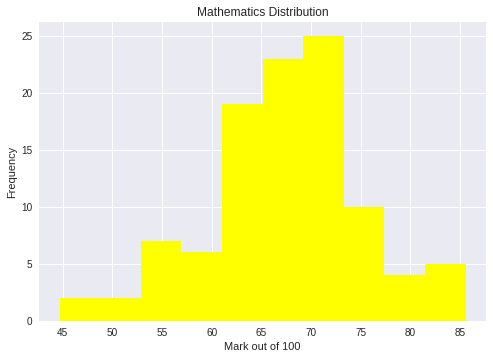

In [83]:
#histogram-univariet
x, y = plt.subplots()
y.hist(school['Math'], color="Yellow")
y.set_title("Mathematics Distribution")
y.set_xlabel("Mark out of 100")
y.set_ylabel("Frequency")
plt.show()

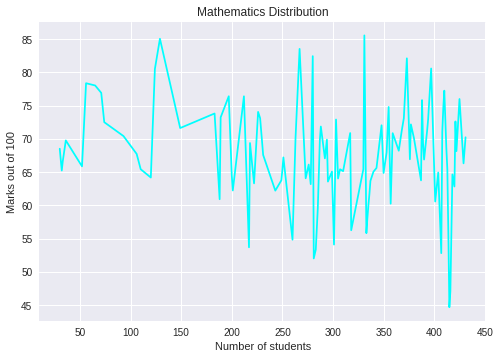

In [81]:
#Density-univariet
x, y = plt.subplots()
y.plot(school['Math'], color="cyan")
y.set_title("Mathematics Distribution")
y.set_xlabel("Number of students")
y.set_ylabel("Marks out of 100")
plt.show()

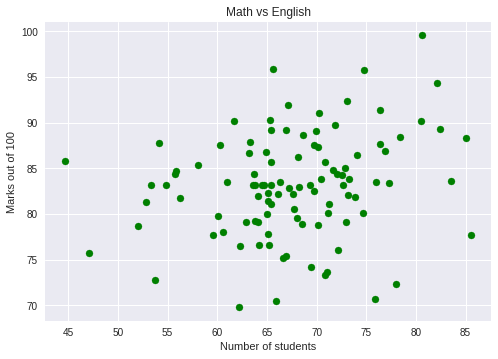

In [79]:
#scatter plot-bivariet
x, y = plt.subplots()
y.scatter(school['Math'], school['English'], color="Green")
y.set_title("Math vs English")
y.set_xlabel("Math-100")
y.set_ylabel("English-100")
plt.show()

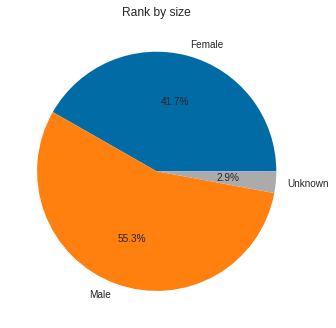

In [95]:
#Pie plot-univariet
x, y = plt.subplots()
school.groupby('Gender').size().plot(kind='pie', autopct="%1.1f%%")#%-wildcard, f for float
y.set_title("Rank by size")
y.set_xlabel("")#leave them blank to avoid writing none on the margins
y.set_ylabel("")

plt.show()

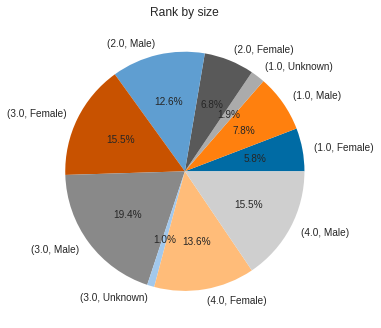

In [96]:
#Pie plot-bivariet
x, y = plt.subplots()
school.groupby(['Rank','Gender']).size().plot(kind='pie', autopct="%1.1f%%")#%-wildcard, f for float
y.set_title("Rank by size and gender")
y.set_xlabel("")#leave them blank to avoid writing none on the margins
y.set_ylabel("")

plt.show()

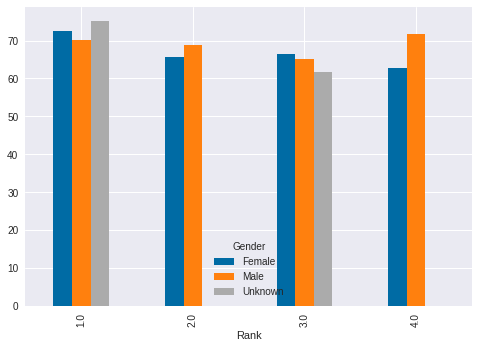

In [104]:
#stacked bar plot-bivariet
school.groupby(['Rank','Gender'])['Math'].mean().unstack().plot(kind='bar', stacked=False)
y.set_title("Rank by size and gender")
y.set_xlabel("Rank and Gender")
y.set_ylabel("Score by Math")

plt.show()